In [1]:
# standard libraries
import pandas as pd
import numpy as np
import re
import os
from IPython.display import Image
#import sklearn
#import time

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#from sklearn.model_selection import StratifiedShuffleSplit

# prediction models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [2]:
os.getcwd()

'C:\\Users\\allep\\QTW_Projects\\case_study_4'

In [3]:
from os import listdir
from os.path import isfile, join
dir_files = [f for f in os.listdir(os.getcwd()+'/data') if os.path.isfile(join(os.getcwd()+'/data', f))]

dir_files

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [4]:
data_dict = {}
full_df = pd.DataFrame()

records = 0

for f in dir_files:
    temp_data = arff.loadarff(os.getcwd()+'/data/'+f)
    temp_df = pd.DataFrame(temp_data[0])
    print(temp_df.shape)
    data_dict.update({f:temp_df})
    full_df = pd.concat([full_df, temp_df])
    records += temp_df.shape[0]
    
print(records)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)
43405


In [5]:
full_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909],
           dtype='int64', length=43405)

In [6]:
full_df = full_df.reset_index(drop=True)
full_df.index

RangeIndex(start=0, stop=43405, step=1)

In [7]:
full_df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
43400,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'
43404,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,b'1'


In [8]:
full_df['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [9]:
full_df['class'].value_counts(normalize=True)

b'0'    0.951826
b'1'    0.048174
Name: class, dtype: float64

In [10]:
full_df['bankrupt'] = ( full_df['class'] == full_df['class'][full_df.shape[0]-1] ).astype(int)
full_df['bankrupt'].value_counts()

0    41314
1     2091
Name: bankrupt, dtype: int64

In [11]:
full_df = full_df.drop('class', axis=1)

In [12]:
full_df.isnull().sum()

Attr1         8
Attr2         8
Attr3         8
Attr4       134
Attr5        89
           ... 
Attr61      102
Attr62      127
Attr63      134
Attr64      812
bankrupt      0
Length: 65, dtype: int64

In [13]:
def split_dependant_and_independant_variables(df: pd.DataFrame, y_var: str):
    X = df.copy()
    y = X[y_var]
    X = X.drop([y_var], axis=1)
    return X, y

In [14]:
X, y = split_dependant_and_independant_variables(full_df, 'bankrupt')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12343)

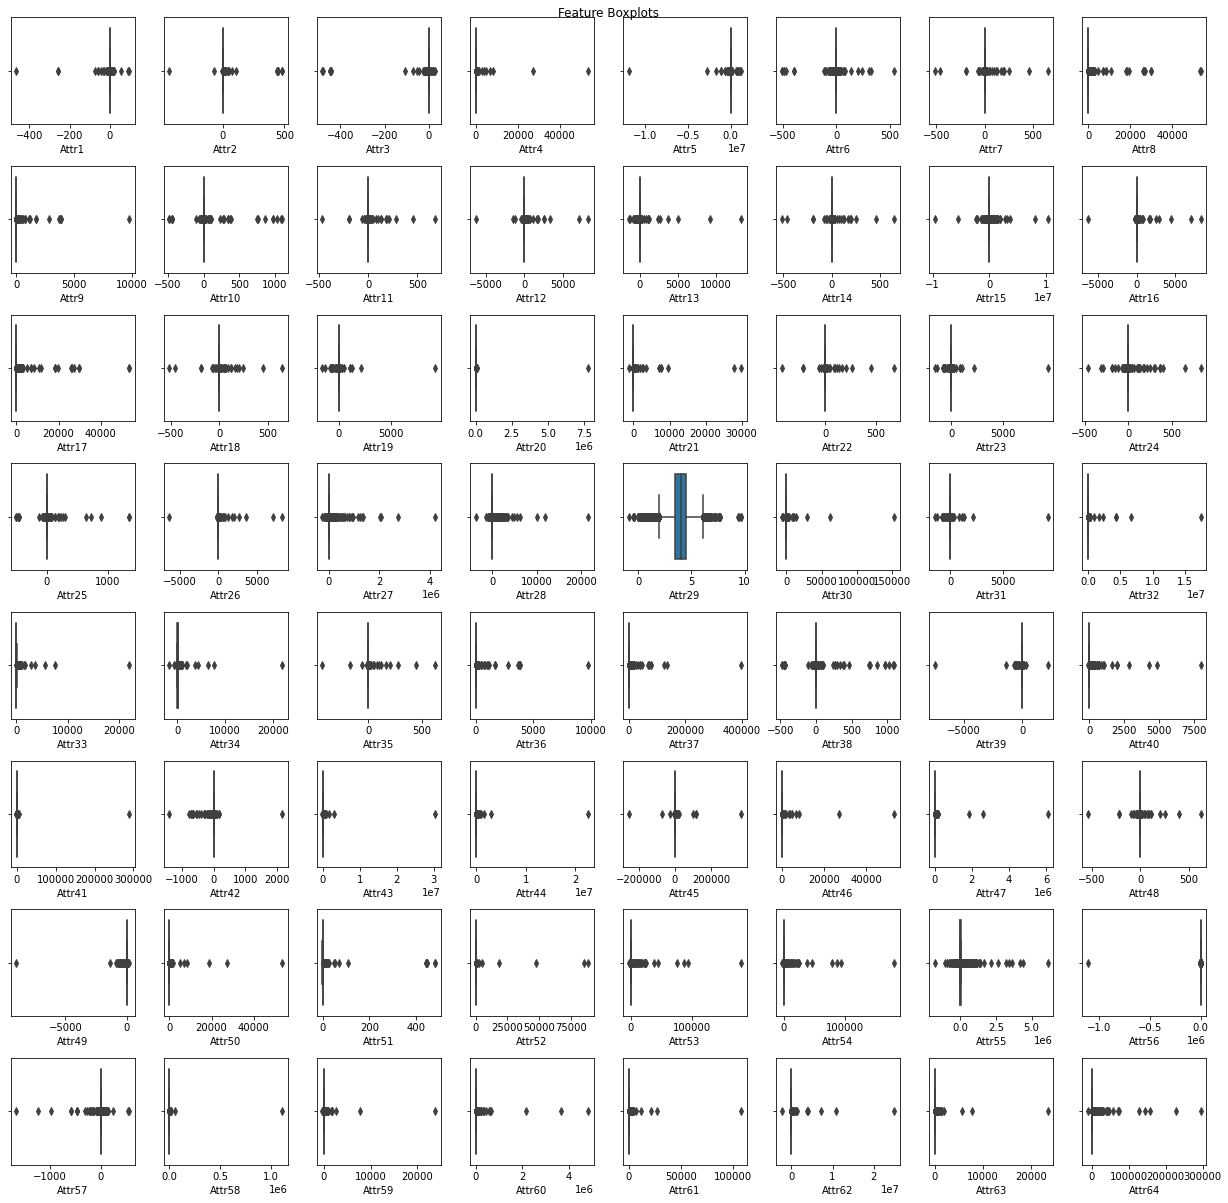

In [15]:
features = X.columns
fig, axes = plt.subplots(8, 8, figsize=(17, 17))
fig.suptitle('Feature Boxplots')
for i,j in zip(features, range(64)):
    sns.boxplot(ax = axes[int(j/8), j%8], x = full_df[i])

fig.tight_layout()

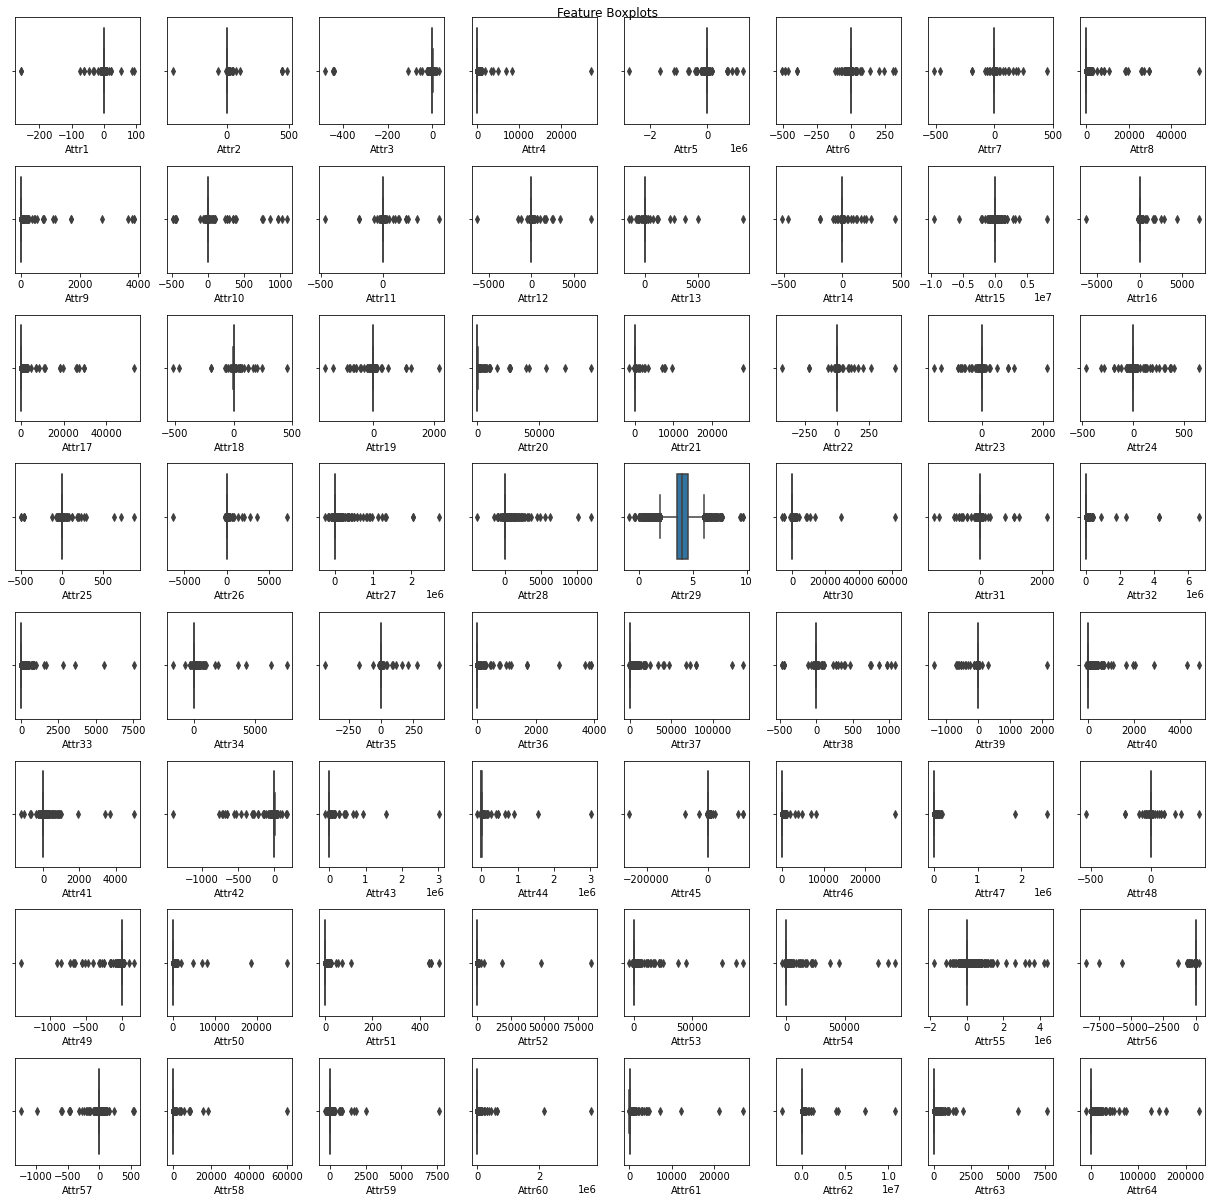

In [16]:
features = X.columns

fig, axes = plt.subplots(8, 8, figsize=(17, 17))
fig.suptitle('Feature Boxplots')
for i,j in zip(features, range(64)):
    sns.boxplot(ax = axes[int(j/8), j%8], 
                x = full_df[i][ abs(full_df[i]) < max( abs(full_df[i].min()), abs(full_df[i].max()) ) ] #remove outliers
                )

fig.tight_layout()

In [17]:
# Use median imputation since many features are highly skewed

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(X_train)

X_train_imp = pd.DataFrame( imp_mean.transform(X_train), columns = X.columns, index = X_train.index )
X_test_imp = pd.DataFrame( imp_mean.transform(X_test), columns = X.columns, index = X_test.index )

In [18]:
def train_test_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train_imp, y_train)
    
    y_hat_rf_train = model.predict(X_train_imp)
    y_hat_rf_test = model.predict(X_test_imp)
    
    train_acc = accuracy_score(y_train, y_hat_rf_train)
    test_acc = accuracy_score(y_test, y_hat_rf_test)
    
    train_f1 = f1_score(y_train, y_hat_rf_train)
    test_f1 = f1_score(y_test, y_hat_rf_test)
    
    scores = train_acc, test_acc, train_f1, test_f1
    new_row = {'max_depth': model.max_depth, 'train_acc': train_acc, 'test_acc': test_acc, 'train_f1': train_f1, 'test_f1': test_f1}
    return new_row

### Not specifying max_depth causes overfitting and poor generalization 
Baseline accuracy = 95.2%

In [19]:
full_df['bankrupt'].value_counts(normalize=True)

0    0.951826
1    0.048174
Name: bankrupt, dtype: float64

In [22]:
rf_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
new_row = train_test_scores(rf_clf, X_train_imp, X_test_imp, y_train, y_test)

results = pd.DataFrame({'max_depth' : [], 'train_acc' : [], 'test_acc' : [], 'train_f1': [], 'test_f1' : []})
results = results.append(new_row, ignore_index=True) 
results

,max_depth,train_acc,test_acc,train_f1,test_f1
0,NaN,1.0,0.957917,1.0,0.341346


### Decreasing max_depth reduces overfitting

In [24]:
results = pd.DataFrame({'max_depth' : [], 'train_acc' : [], 'test_acc' : [], 'train_f1': [], 'test_f1' : []})

for i in range(5,20):
    rf_clf_2 = RandomForestClassifier(random_state=0, class_weight='balanced', max_depth = i)
    new_row = train_test_scores(rf_clf_2, X_train_imp, X_test_imp, y_train, y_test)
    results = results.append(new_row, ignore_index=True) 
    print("max_depth =", i, "complete")

max_depth = 5 complete
max_depth = 6 complete
max_depth = 7 complete
max_depth = 8 complete
max_depth = 9 complete
max_depth = 10 complete
max_depth = 11 complete
max_depth = 12 complete
max_depth = 13 complete
max_depth = 14 complete
max_depth = 15 complete
max_depth = 16 complete
max_depth = 17 complete
max_depth = 18 complete
max_depth = 19 complete


In [25]:
results.index = results['max_depth'].astype(int)
results = results.drop('max_depth', axis=1)
results

,train_acc,test_acc,train_f1,test_f1
max_depth,,,,
5,0.801632,0.793119,0.272189,0.265139
6,0.842741,0.832898,0.331748,0.305680
7,0.879966,0.865382,0.398483,0.341720
8,0.915117,0.893565,0.494016,0.381250
9,0.940197,0.915374,0.586952,0.415074
10,0.959254,0.928352,0.681912,0.429358
11,0.971991,0.940716,0.760484,0.456338
12,0.979660,0.945247,0.816943,0.450270
13,0.986637,0.949777,0.872887,0.446701


<AxesSubplot:xlabel='max_depth'>

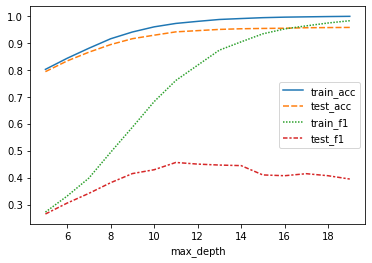

In [26]:
sns.lineplot(data=results)

### Nicer looking visual

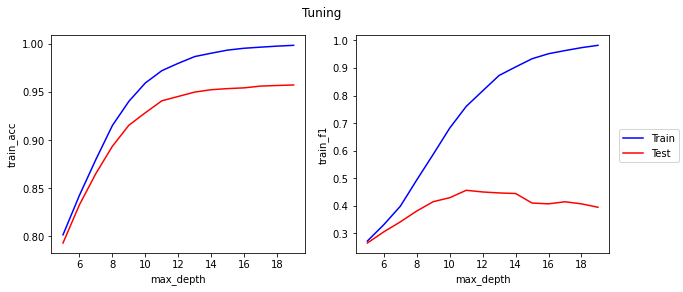

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Tuning')
sns.lineplot(ax=axes[0], data=results, x='max_depth', y='train_acc', color='blue')
sns.lineplot(ax=axes[0], data=results, x='max_depth', y='test_acc', color='red')
fig.legend(['Train','Test'], loc='right')

sns.lineplot(ax=axes[1], data=results, x='max_depth', y='train_f1', color='blue')
sns.lineplot(ax=axes[1], data=results, x='max_depth', y='test_f1', color='red')
plt.show()